In [1]:
%tensorflow_version 2.x

import tensorflow as tf


from tensorflow.keras.datasets import imdb
!pip install -q tensorflow-hub
!pip install -q tfds-nightly
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

import string
import numpy as np
import matplotlib.pylab as plt

#dark mode
# plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


In [2]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)


Version:  2.1.0
Eager mode:  True
Hub version:  0.7.0


#DataSet

In [0]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)


In [0]:
#first_60_percent = tfds.Split.TRAIN.subsplit(tfds.percent[:60])
#last_40_percent = tfds.Split.TRAIN.subsplit(tfds.percent[-40:])


In [0]:
#train_data, validation_data, test_data = tfds.load(
 #   name="imdb_reviews", 
  #  split=[first_60_percent, last_40_percent, 'test'],
   # as_supervised=True)

#Model

In [0]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[],
                           dtype=tf.string, trainable=True)

In [0]:
model = Sequential([
  hub_layer,
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')                  
])

In [5]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 6s 199ms/step - loss: 0.7865 - accuracy: 0.5163 - val_loss: 0.6746 - val_accuracy: 0.5842
Epoch 2/20
30/30 [==============================] - 6s 186ms/step - loss: 0.6449 - accuracy: 0.6261 - val_loss: 0.6255 - val_accuracy: 0.6469
Epoch 3/20
30/30 [==============================] - 6s 193ms/step - loss: 0.6025 - accuracy: 0.6764 - val_loss: 0.5936 - val_accuracy: 0.6899
Epoch 4/20
30/30 [==============================] - 6s 196ms/step - loss: 0.5711 - accuracy: 0.7095 - val_loss: 0.5652 - val_accuracy: 0.7156
Epoch 5/20
30/30 [==============================] - 6s 193ms/step - loss: 0.5392 - accuracy: 0.7352 - val_loss: 0.5377 - val_accuracy: 0.7418
Epoch 6/20
30/30 [==============================] - 6s 196ms/step - loss: 0.5090 - accuracy: 0.7608 - val_loss: 0.5120 - val_accuracy: 0.7602
Epoch 7/20
30/30 [==============================] - 6s 207ms/step - loss: 0.4765 - accuracy: 0.7849 - val_loss: 0.4837 - val_accuracy: 0.7829
Epoch 

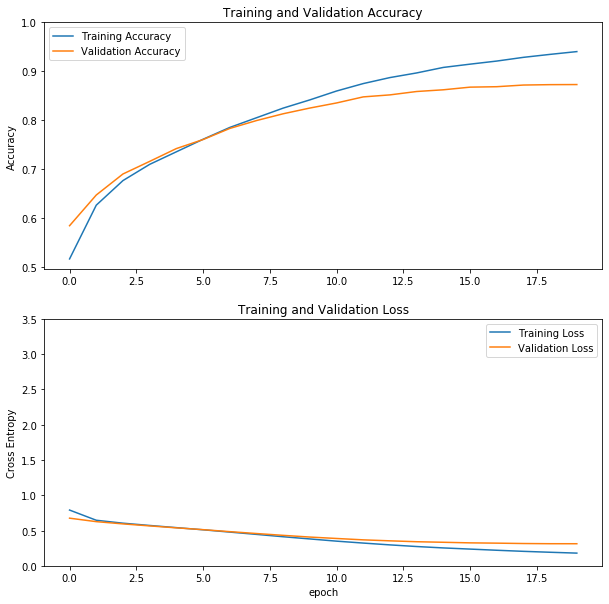

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.0])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([0.0,3.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()